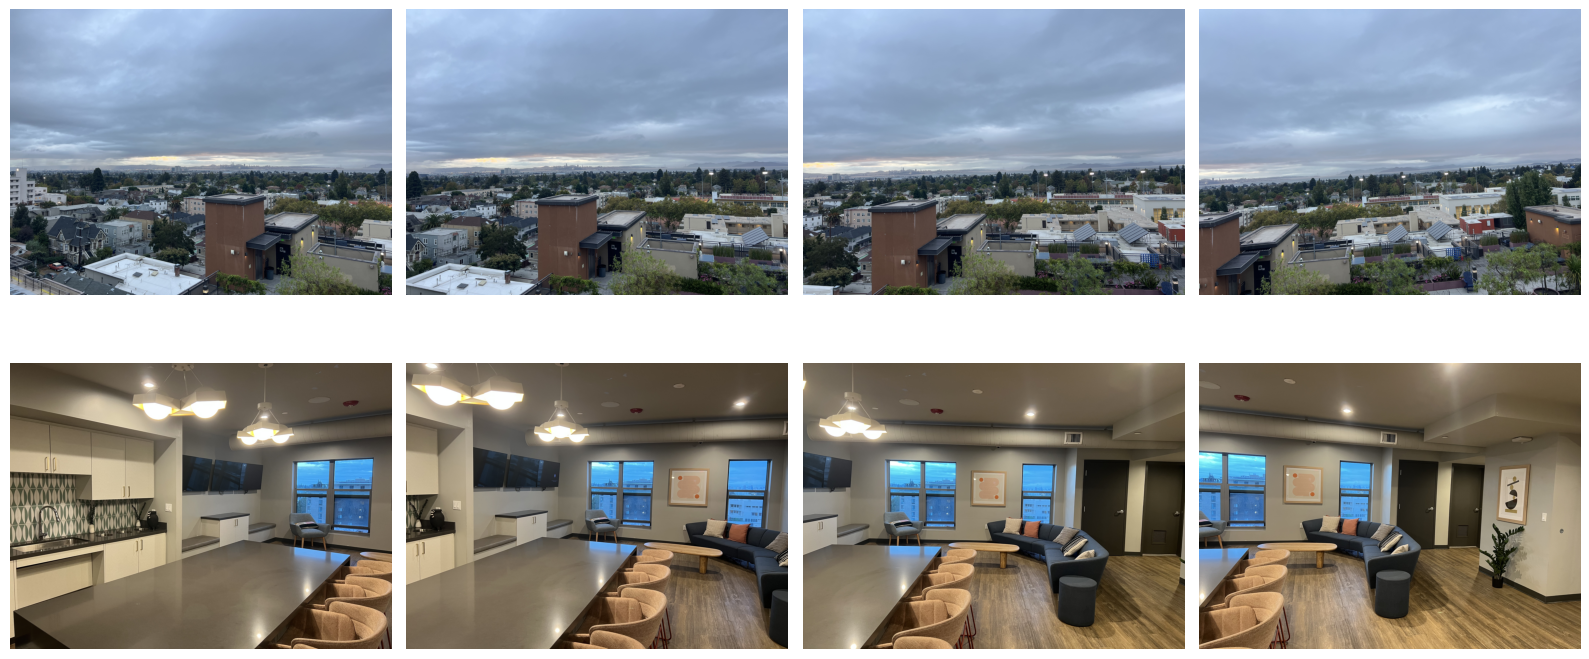

In [95]:
# A.1
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

image_files = [
    "landscape1.jpg", "landscape2.jpg", "landscape3.jpg", "landscape4.jpg",
    "inside1.jpg", "inside2.jpg", "inside3.jpg", "inside4.jpg"
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    img = mpimage.imread(image_files[i])
    ax.imshow(img)
    ax.axis("off")             

plt.tight_layout()
plt.show()

In [96]:
# A.2
import numpy as np

def computeH(im1_pts, im2_pts):
    A = []
    b = []
    n = im1_pts.shape[0]
    for i in range(n):
        x, y = im1_pts[i]
        u, v = im2_pts[i]
        A.append([x, y, 1, 0, 0, 0, -u * x, -u * y])
        b.append(u)
        A.append([0, 0, 0, x, y, 1, -v * x, -v * y])
        b.append(v)
    A = np.array(A)
    b = np.array(b)

    h, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    H = np.array([[h[0], h[1], h[2]],
                  [h[3], h[4], h[5]],
                  [h[6], h[7], 1.0]])
    return H

Homography Matrix: [[ 1.33437925e+00 -4.47218776e-02 -1.07262312e+03]
 [ 1.40441962e-01  1.13252177e+00 -2.39534564e+02]
 [ 9.44219893e-05 -2.51788604e-05  1.00000000e+00]]


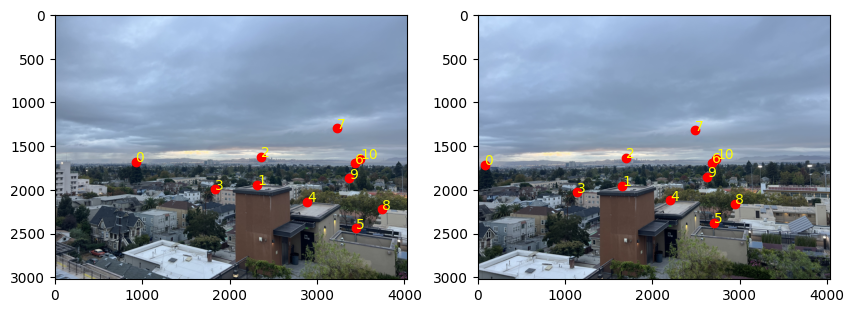

In [97]:
im1_landscape = mpimage.imread("landscape1.jpg")
im2_landscape = mpimage.imread("landscape2.jpg")
im1_pts = np.array([[924,1676],[2316,1941],[2354,1621],[1831,1994],[2890,2139],[3448,2441],[3433,1697],[3227,1295],[3746,2221],[3367,1867],[3494,1646]])
im2_pts = np.array([[80,1712],[1653,1955],[1695,1630],[1142,2027],[2200,2120],[2701,2379],[2681,1689],[2488,1320],[2951,2162],[2627,1848],[2733,1642]])

H_landscape = computeH(im1_pts, im2_pts)
print(f"Homography Matrix: {H_landscape}")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im1_landscape)
plt.scatter(im1_pts[:,0], im1_pts[:,1], c='r', marker='o')
for i, (x,y) in enumerate(im1_pts):
    plt.text(x, y, str(i), color='yellow')

plt.subplot(1,2,2)
plt.imshow(im2_landscape)
plt.scatter(im2_pts[:,0], im2_pts[:,1], c='r', marker='o')
for i, (x,y) in enumerate(im2_pts):
    plt.text(x, y, str(i), color='yellow')

plt.show()

Homography Matrix: [[ 1.51771976e+00 -1.13667471e-04 -1.59786792e+03]
 [ 1.89873898e-01  1.28438160e+00 -4.61985366e+02]
 [ 1.27445928e-04 -2.76085941e-06  1.00000000e+00]]


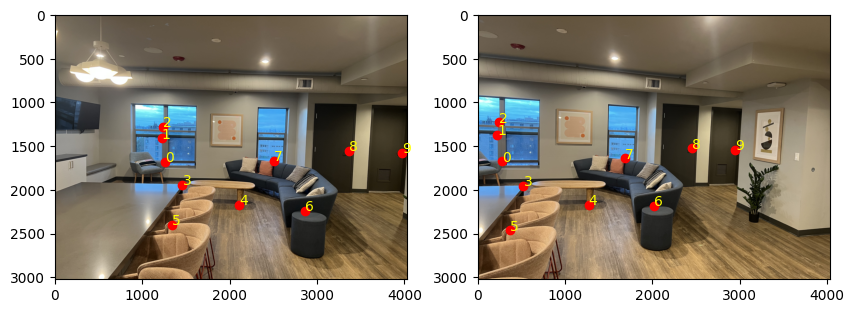

In [98]:
im1_inside = mpimage.imread("inside3.jpg")
im2_inside = mpimage.imread("inside4.jpg")
im1_pts = np.array([[1260,1677],[1224,1411],[1240,1276],[1460,1945],[2112,2173],[1341,2400],[2865,2243],[2509,1667],[3365,1554],[3970,1579]])
im2_pts = np.array([[275,1673],[223,1369],[244,1227],[525,1957],[1271,2171],[373,2463],[2024,2180],[1687,1640],[2459,1523],[2949,1544]])

H_inside = computeH(im1_pts, im2_pts)
print(f"Homography Matrix: {H}")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im1_inside)
plt.scatter(im1_pts[:,0], im1_pts[:,1], c='r', marker='o')
for i, (x,y) in enumerate(im1_pts):
    plt.text(x, y, str(i), color='yellow')

plt.subplot(1,2,2)
plt.imshow(im2_inside)
plt.scatter(im2_pts[:,0], im2_pts[:,1], c='r', marker='o')
for i, (x,y) in enumerate(im2_pts):
    plt.text(x, y, str(i), color='yellow')

plt.show()

In [99]:
# A.2

def warpImageNearestNeighbor(im, H):
    height, width = im.shape[:2]
    H_inverse = np.linalg.inv(H)
    if im.shape[2] == 3:
        alpha = np.ones((height, width, 1), dtype=im.dtype) * 255
        im = np.concatenate([im, alpha], axis=2)
    corners = np.array([[0, 0, 1], [width-1, 0, 1], [0, height-1, 1], [width-1, height-1, 1]]).T
    new_corners = H @ corners
    new_corners /= new_corners[2, :]
    min_x = int(np.floor(np.min(new_corners[0])))
    min_y = int(np.floor(np.min(new_corners[1])))
    max_x = int(np.ceil(np.max(new_corners[0])))
    max_y = int(np.ceil(np.max(new_corners[1])))
    print("Bounding box:", min_x, max_x, min_y, max_y)

    new_image = np.zeros((max_y - min_y + 1, max_x - min_x + 1, im.shape[2]), dtype=im.dtype)
    for y in range(max_y - min_y + 1):
        for x in range(max_x - min_x + 1):
            coord = np.array([x + min_x, y + min_y, 1])
            new_coord = H_inverse @ coord
            new_coord /= new_coord[2]
            new_x = int(round(new_coord[0]))
            new_y = int(round(new_coord[1]))
            if 0 <= new_x < width and 0 <= new_y < height:
                new_image[y, x] = im[new_y, new_x]
    return new_image

Bounding box: -1308 3198 -240 3447
Bounding box: -1612 3003 -462 3450


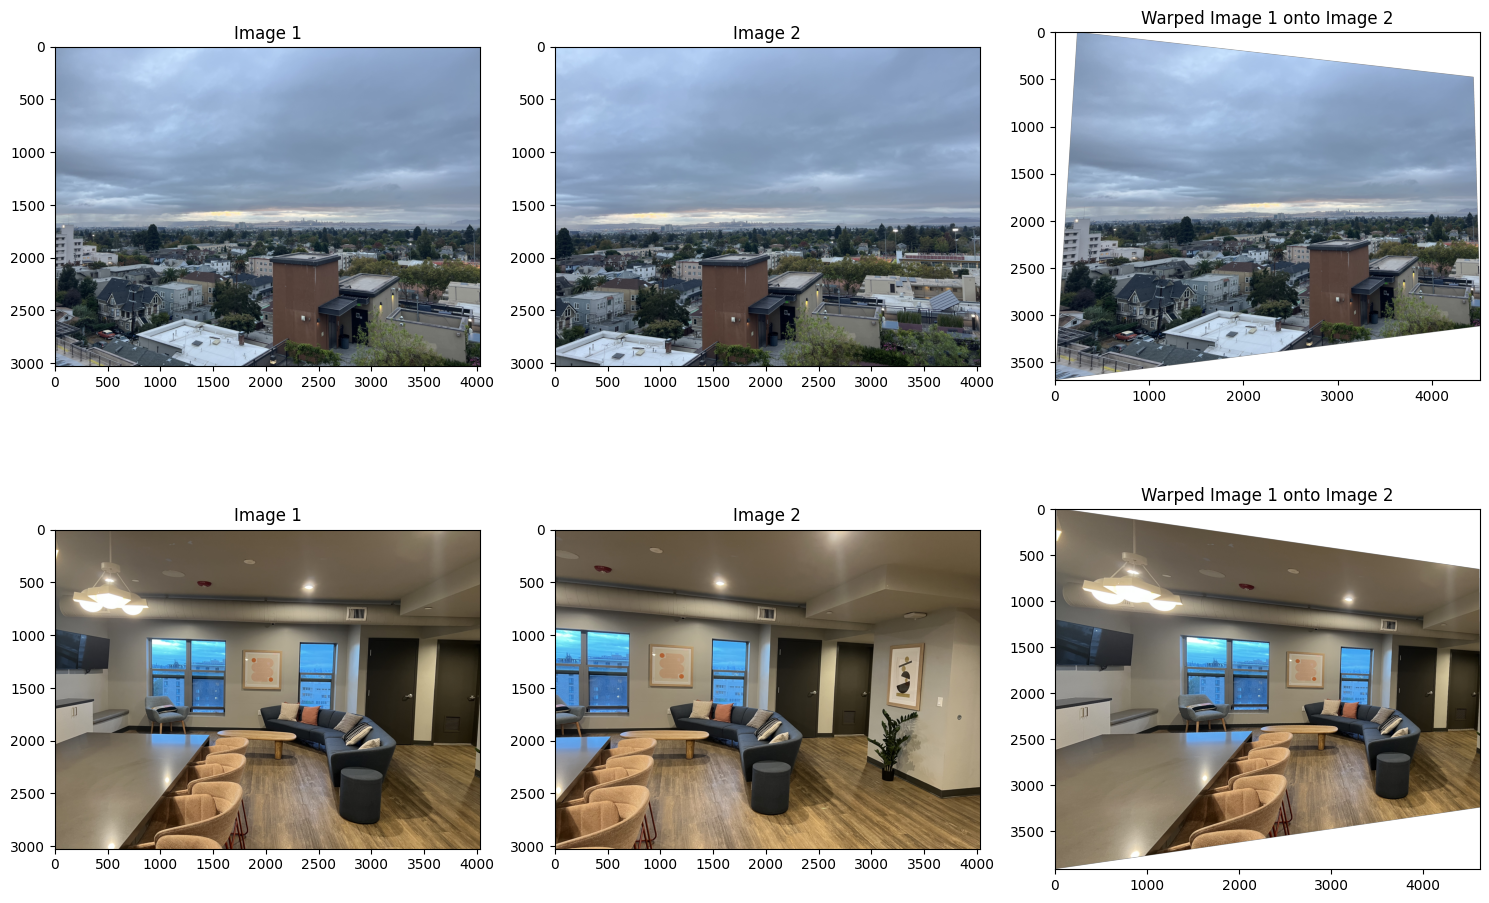

In [102]:
im1_warped_landscape = warpImageNearestNeighbor(im1_landscape, H_landscape)
im1_warped_inside = warpImageNearestNeighbor(im1_inside, H_inside)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('Image 1')
plt.imshow(im1_landscape)

plt.subplot(2,3,2)
plt.title('Image 2')
plt.imshow(im2_landscape)

plt.subplot(2,3,3)
plt.title('Warped Image 1 onto Image 2')
plt.imshow(im1_warped_landscape)

plt.subplot(2,3,4)
plt.title('Image 1')
plt.imshow(im1_inside)

plt.subplot(2,3,5)
plt.title('Image 2')
plt.imshow(im2_inside)

plt.subplot(2,3,6)
plt.title('Warped Image 1 onto Image 2')
plt.imshow(im1_warped_inside)

plt.tight_layout()
plt.show()

In [115]:
def warpImageBilinear(im, H):
    height, width = im.shape[:2]
    H_inverse = np.linalg.inv(H)
    if im.shape[2] == 3:
        alpha = np.ones((height, width, 1), dtype=im.dtype) * 255
        im = np.concatenate([im, alpha], axis=2)
    corners = np.array([[0, 0, 1], [width-1, 0, 1], [0, height-1, 1], [width-1, height-1, 1]]).T
    new_corners = H @ corners
    new_corners /= new_corners[2, :]
    min_x = int(np.floor(np.min(new_corners[0])))
    min_y = int(np.floor(np.min(new_corners[1])))
    max_x = int(np.ceil(np.max(new_corners[0])))
    max_y = int(np.ceil(np.max(new_corners[1])))
    print("Bounding box:", min_x, max_x, min_y, max_y)

    new_image = np.zeros((max_y - min_y + 1, max_x - min_x + 1, im.shape[2]), dtype=im.dtype)
    for y in range(max_y - min_y + 1):
        for x in range(max_x - min_x + 1):
            coord = np.array([x + min_x, y + min_y, 1], dtype=np.float64)
            new_coord = H_inverse @ coord
            new_coord /= new_coord[2]
            new_x, new_y = new_coord[0], new_coord[1]
            if 0 <= new_x < width - 1 and 0 <= new_y < height - 1:
                x0, y0 = int(np.floor(new_x)), int(np.floor(new_y))
                x1, y1 = x0 + 1, y0 + 1
                dist_x, dist_y = new_x - x0, new_y - y0
                up = (1 - dist_x) * (1 - dist_y) * im[y0, x0]
                down = (1 - dist_x) * dist_y * im[y1, x0]
                left = dist_x * (1 - dist_y) * im[y0, x1]
                right = dist_x * dist_y * im[y1, x1]
                new_image[y, x] = up + down + left + right
    return new_image, (min_x, min_y)

Bounding box: -1308 3198 -240 3447
Bounding box: -1612 3003 -462 3450


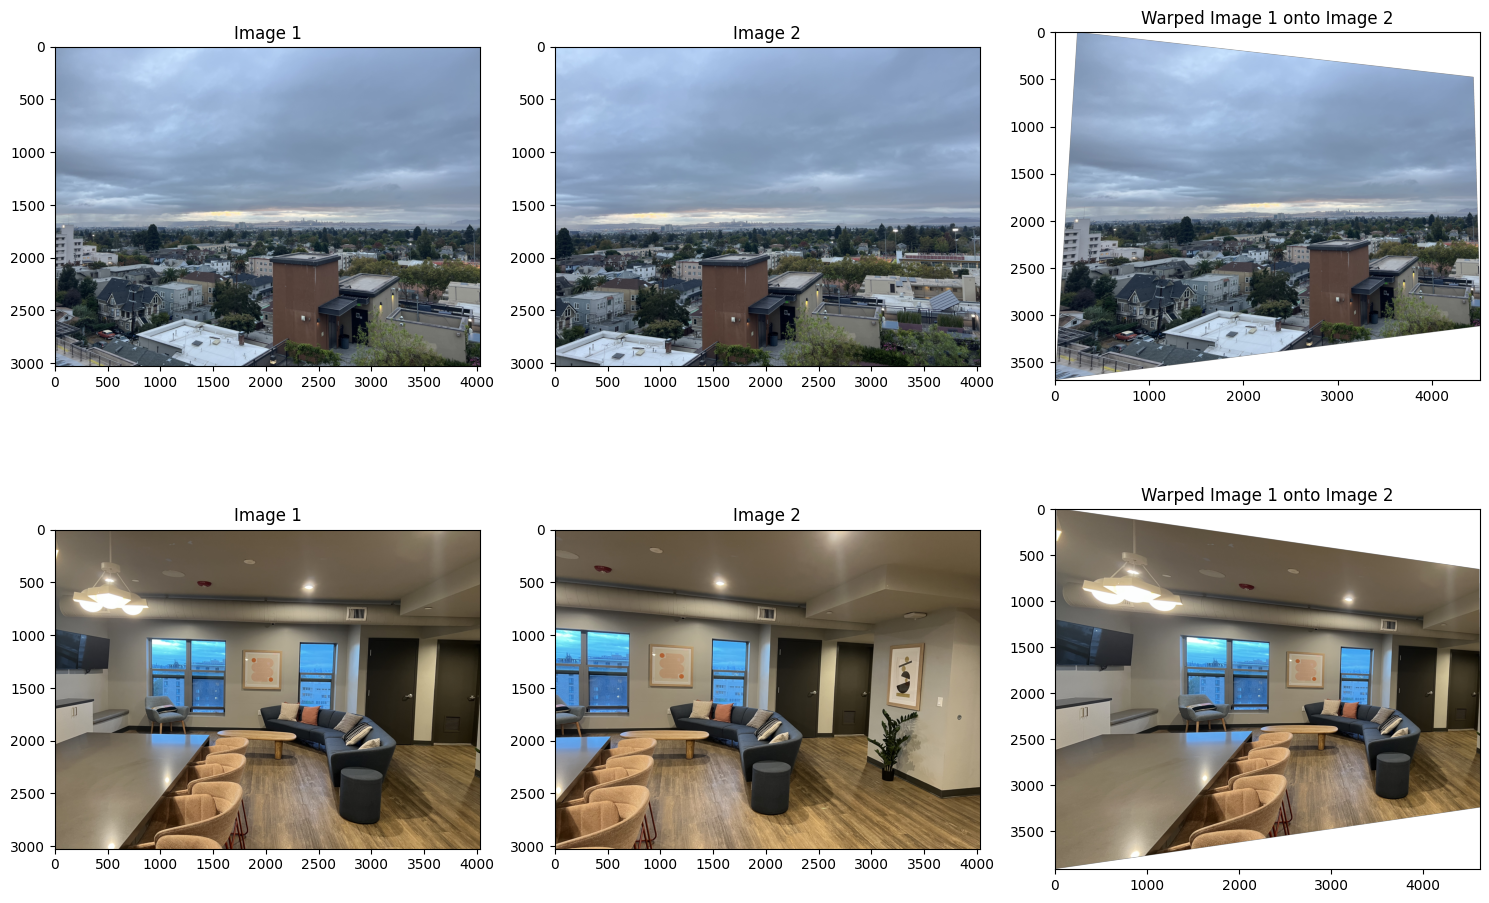

In [ ]:
im1_warped_landscape, _ = warpImageBilinear(im1_landscape, H_landscape)
im1_warped_inside, _ = warpImageBilinear(im1_inside, H_inside)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('Image 1')
plt.imshow(im1_landscape)

plt.subplot(2,3,2)
plt.title('Image 2')
plt.imshow(im2_landscape)

plt.subplot(2,3,3)
plt.title('Warped Image 1 onto Image 2')
plt.imshow(im1_warped_landscape)

plt.subplot(2,3,4)
plt.title('Image 1')
plt.imshow(im1_inside)

plt.subplot(2,3,5)
plt.title('Image 2')
plt.imshow(im2_inside)

plt.subplot(2,3,6)
plt.title('Warped Image 1 onto Image 2')
plt.imshow(im1_warped_inside)

plt.tight_layout()
plt.show()

Bounding box: -1070 11732 -7704 2451
Bounding box: -1070 11732 -7704 2451
Bounding box: -747 8186 -7704 2451
Bounding box: -747 8186 -7704 2451


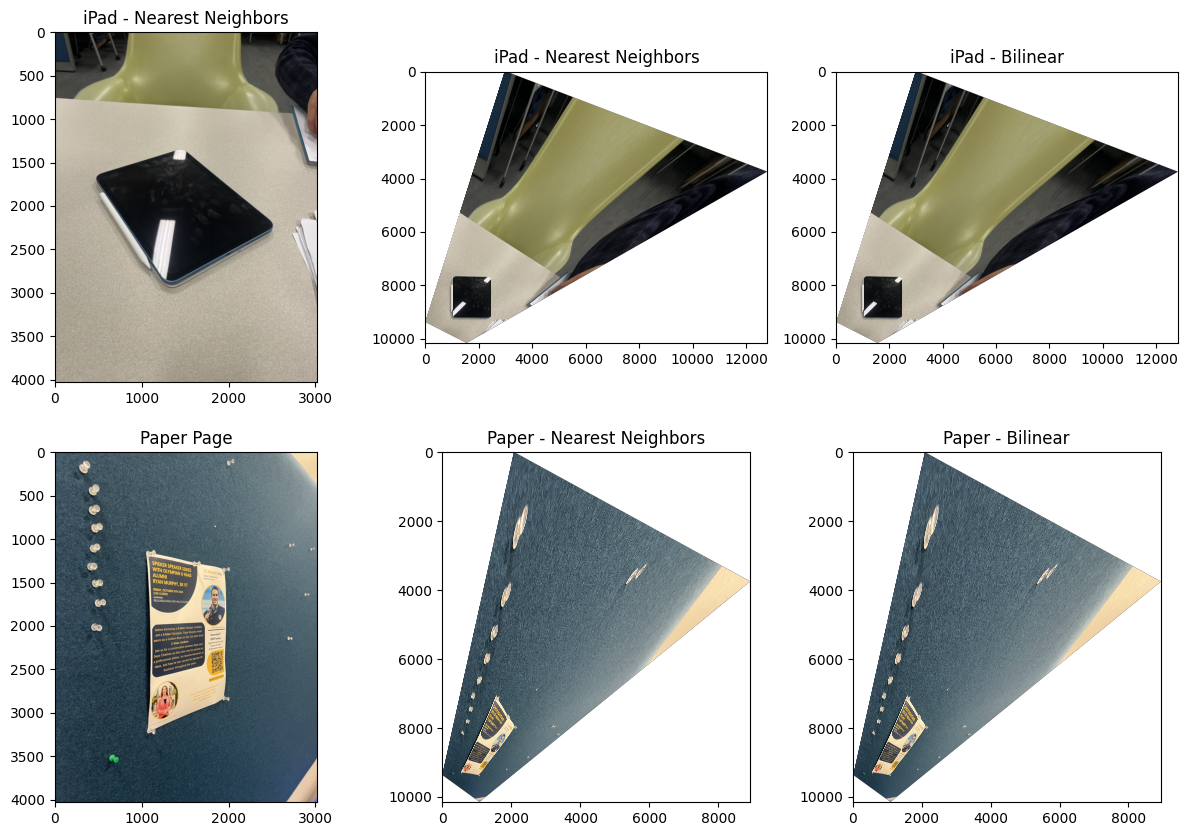

In [147]:
# Rectification

ipad = mpimage.imread("ipad.jpg")
notebook = mpimage.imread("paper.jpg")
ipad_pts = np.array([[476,1673],[1317,2903],[2505,2232],[1448,1356]])
paper_pts = np.array([[1053,1152],[1074,3229],[1942,2837],[1952,1352]])
top_width = np.linalg.norm(ipad_pts[0] - ipad_pts[3])
bottom_width = np.linalg.norm(ipad_pts[1] - ipad_pts[2])
W = int(max(top_width, bottom_width))

left_height = np.linalg.norm(ipad_pts[0] - ipad_pts[1])
right_height = np.linalg.norm(ipad_pts[3] - ipad_pts[2])
H = int(max(left_height, right_height))

rect_pts = np.array([[0,0],[0,H-1],[W-1,H-1],[W-1,0]])
H_rectification = computeH(ipad_pts, rect_pts)
ipad_nn = warpImageNearestNeighbor(ipad, H_rectification)
ipad_b, _ = warpImageBilinear(ipad, H_rectification)
top_width = np.linalg.norm(paper_pts[0] - paper_pts[3])
bottom_width = np.linalg.norm(paper_pts[1] - paper_pts[2])
W = int(max(top_width, bottom_width))

left_height = np.linalg.norm(paper_pts[0] - paper_pts[1])
right_height = np.linalg.norm(paper_pts[3] - paper_pts[2])
rect_pts = np.array([[0,0],[0,H-1],[W-1,H-1],[W-1,0]])
H = int(max(left_height, right_height))
H_rectification = computeH(ipad_pts, rect_pts)
notebook_nn = warpImageNearestNeighbor(notebook, H_rectification)
notebook_b, _ = warpImageBilinear(notebook, H_rectification)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('iPad - Nearest Neighbors')
plt.imshow(ipad)

plt.subplot(2,3,2)
plt.title('iPad - Nearest Neighbors')
plt.imshow(ipad_nn)

plt.subplot(2,3,3)
plt.title('iPad - Bilinear')
plt.imshow(ipad_b)

plt.subplot(2,3,4)
plt.title('Paper Page')
plt.imshow(notebook)

plt.subplot(2,3,5)
plt.title('Paper - Nearest Neighbors')
plt.imshow(notebook_nn)

plt.subplot(2,3,6)
plt.title('Paper - Bilinear')
plt.imshow(notebook_b)

In [173]:
# A.4

from scipy.ndimage import distance_transform_edt

def create_alpha(image, H):
    height, width = image.shape[:2]
    mask = np.ones((height, width), dtype=np.uint8)
    # 1 at center, 0 elsewgere
    mask[0, :] = 0
    mask[-1, :] = 0
    mask[:, 0] = 0
    mask[:, -1] = 0  
    distance = distance_transform_edt(mask)  
    if distance.max() > 0:
        alpha = distance / distance.max()
    else:
        alpha = np.ones((height, width))
    # add alpha channel
    image_alpha = np.dstack([image, (alpha * 255).astype(image.dtype)])
    warped_image, offset = warpImageBilinear(image_alpha, H)
    return warped_image, offset

def mosaic(images, homographies):
    height, width = images[0].shape[:2]
    mask = np.ones((height, width), dtype=np.uint8)
    mask[0, :] = 0
    mask[-1, :] = 0
    mask[:, 0] = 0
    mask[:, -1] = 0
    dist = distance_transform_edt(mask)
    if dist.max() > 0:
        mosaic_alpha = dist / dist.max()
    else:
        mosaic_alpha = np.ones((height, width))
    mosaic_channels = images[0].astype(np.float64)
    mosaic_offset = (0, 0)
        
    for i, (im, H) in enumerate(zip(images, homographies)):
        if i == 0:
            continue
                
        warped_image, new_offset = create_alpha(im, H)
        new_rgb = warped_image[:, :, :3].astype(np.float64)
        new_alpha = warped_image[:, :, 3].astype(np.float64) / 255.0
        
        # new bounding box
        new_min_x = min(mosaic_offset[0], new_offset[0])
        new_min_y = min(mosaic_offset[1], new_offset[1])
        new_max_x = max(mosaic_offset[0] + mosaic_channels.shape[1], 
                        new_offset[0] + new_rgb.shape[1])
        new_max_y = max(mosaic_offset[1] + mosaic_channels.shape[0], 
                        new_offset[1] + new_rgb.shape[0])
        
        expanded_rgb = np.zeros((new_max_y - new_min_y, new_max_x - new_min_x, 3), dtype=np.float64)
        expanded_alpha = np.zeros((new_max_y - new_min_y, new_max_x - new_min_x), dtype=np.float64)
        
        mosaic_x = mosaic_offset[0] - new_min_x
        mosaic_y = mosaic_offset[1] - new_min_y
        h, w = mosaic_channels.shape[:2]
        expanded_rgb[mosaic_y:mosaic_y+h, mosaic_x:mosaic_x+w] = mosaic_channels * mosaic_alpha[:, :, np.newaxis]
        expanded_alpha[mosaic_y:mosaic_y+h, mosaic_x:mosaic_x+w] = mosaic_alpha
        
        new_x, new_y = new_offset[0] - new_min_x, new_offset[1] - new_min_y
        h, w = new_rgb.shape[:2]
        expanded_rgb[new_y:new_y+h, new_x:new_x+w] += new_rgb * new_alpha[:, :, np.newaxis]
        expanded_alpha[new_y:new_y+h, new_x:new_x+w] += new_alpha
        
        # normalize ts
        mask = expanded_alpha > 0
        mosaic_channels = np.zeros_like(expanded_rgb)
        for c in range(3):
            mosaic_channels[:, :, c][mask] = expanded_rgb[:, :, c][mask] / expanded_alpha[mask]
        
        mosaic_alpha = np.clip(expanded_alpha, 0, 1)
        mosaic_offset = (new_min_x, new_min_y)
    
    return mosaic_channels.astype(np.uint8)

Bounding box: 706 4966 -243 3285


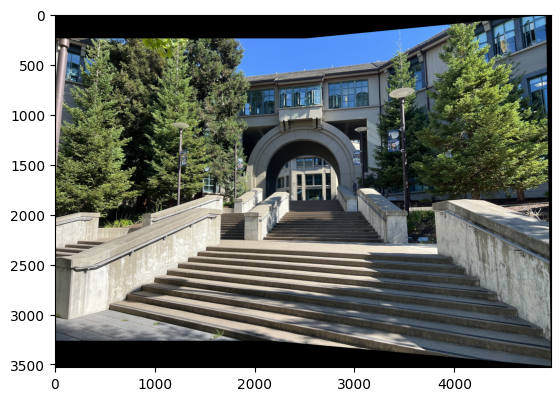

In [174]:
H1 = None
im1_pts = np.array([[717,2552],[865,2474],[998,2388],[1121,2318],[1235,2248],[1336,2189],[1430,2136],[1515,2080],[959,1758],[875,1760],[1257,904],[1326,1108],[1888,2009],[2034,1744],[2086,1986],[2304,1738],[2381,1441],[1899,763],[2293,668],[2791,681],[3330,1140],[3313,1726],[3283,2040],[3055,1728],[3771,1652],[2831,1610],[2493,302],[2214,332],[2770,273]])
im2_pts = np.array([[15,2642],[189,2546],[347,2446],[494,2364],[623,2285],[736,2221],[841,2156],[938,2099],[306,1765],[205,1770],[650,850],[723,1067],[1343,2015],[1496,1736],[1546,1983],[1774,1731],[1857,1434],[1358,728],[1762,657],[2245,699],[2734,1156],[2716,1708],[2687,2004],[2480,1711],[3111,1639],[2280,1601],[1959,307],[1682,316],[2229,297]])
H2 = computeH(im2_pts, im1_pts)
homographies = [H1, H2]
images = [mpimage.imread("haas1.jpg"), mpimage.imread("haas2.jpg")]
mosaic = mosaic(images, homographies)
plt.imshow(mosaic)

Starting with reference image 0

Adding image 2/2...
Bounding box: 1255 6325 -844 3569


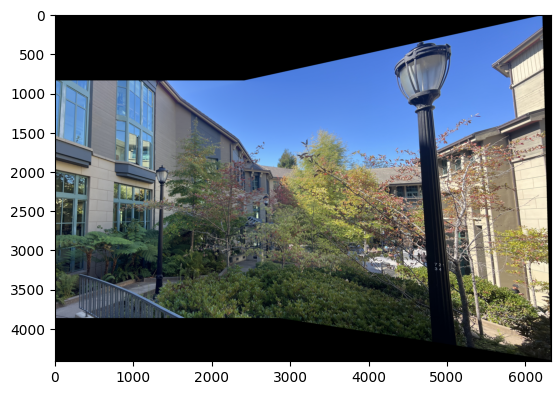

In [ ]:
H1 = None
im1_pts = np.array([[1365,1074],[1347,1274],[2477,1734],[2263,2252],[2309,2292],[2110,2489],[2738,1141],[2340,749],[2684,1452],[2243,2337],[2075,996],[2652,779],[3126,784],[3383,588],[3513,1122],[2678,1558],[3719,2532],[2288,2328],[1608,2327],[2864,2833],[3102,2655]])
im2_pts = np.array([[112,990],[77,1220],[1406,1762],[1156,2302],[1202,2343],[975,2568],[1677,1181],[1290,749],[1621,1485],[1127,2396],[998,973],[1609,819],[2044,871],[2253,723],[2354,1215],[1612,1588],[2480,2462],[1184,2379],[387,2433],[1751,2831],[1970,2628]])
H2 = computeH(im2_pts, im1_pts)
homographies = [H1, H2]
images = [mpimage.imread("library1.jpg"), mpimage.imread("library2.jpg")]
mosaic = mosaic(images, homographies)
plt.imshow(mosaic)

Starting with reference image 0

Adding image 2/2...
Bounding box: 1390 6660 -955 3729


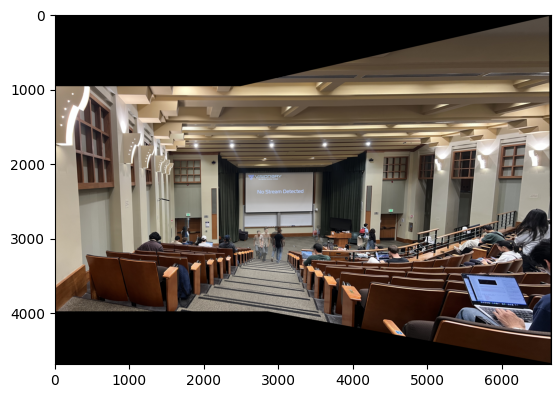

In [ ]:
H1 = None
im1_pts = np.array([[1595,1303],[1680,1183],[1768,1196],[1765,1099],[1583,1032],[1743,814],[1812,1709],[1757,1711],[2662,2206],[2623,2231],[2602,2239],[2569,2245],[2530,2252],[2490,2261],[2429,2268],[3023,1698],[2594,1191],[3278,2401],[3377,2416],[3472,2469],[3606,2547],[3845,2675],[3692,1762],[3972,1792],[3698,1951],[3470,1149],[2815,977]])
im2_pts = np.array([[245,1269],[364,1138],[476,1160],[476,1051],[242,957],[454,731],[521,1741],[448,1744],[1461,2226],[1423,2253],[1397,2267],[1364,2277],[1328,2284],[1284,2298],[1220,2308],[1816,1714],[1417,1212],[2021,2366],[2105,2370],[2179,2411],[2286,2472],[2469,2559],[2362,1766],[2569,1791],[2365,1933],[2200,1221],[1631,1019]])
H2 = computeH(im2_pts, im1_pts)
homographies = [H1, H2]
images = [mpimage.imread("lecture1.jpg"), mpimage.imread("lecture2.jpg")]
mosaic = mosaic(images, homographies)
plt.imshow(mosaic)